# Exploring and Analyzing Text Data Assignment 

In [1]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [3]:
path = '/content/drive/MyDrive/Datasets/cnn_articles'
doc_pattern = r'.*\.txt'
corpus = PlaintextCorpusReader(path, doc_pattern)
corpus

<PlaintextCorpusReader in '/content/drive/MyDrive/Datasets/cnn_articles'>

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [4]:
corpus.fileids()

['article_0.txt',
 'article_1.txt',
 'article_10.txt',
 'article_11.txt',
 'article_12.txt',
 'article_13.txt',
 'article_2.txt',
 'article_3.txt',
 'article_4.txt',
 'article_5.txt',
 'article_6.txt',
 'article_7.txt',
 'article_8.txt',
 'article_9.txt']

In [5]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]
docs[0]

'Pink taking a break to focus on familyUpdated 10:18 AM ET, Thu November 14, 2019(CNN) - Pink has been working pretty hard and it sounds like she will be taking a step back in 2020.Speaking with "Entertainment Tonight" on the Country Music Association Awards red carpet, the singer was joined by her husband, Carey Hart, and their kids Willow, 8, and Jameson, 2.Pink was there to perform her song "Love Me Anyway" with country star Chris Stapleton, and she  talked about how hectic things have been. "We did two and a half years of [music] and Willow\'s back in school now, Jameson\'s going to start pre-school soon," Pink said. "It\'s kind of the year of the family."The star also praised her husband, with whom she will celebrate 14 years of marriage in January."Carey has a lot going on as well," she said of Hart, who went from being a professional motocross competitor to racing off-road trucks. "He\'s super supportive, he follows me around the world and now it\'s his turn."According to Billbo

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [6]:
def doc_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [token.lower() for token in tokens
            if token.lower() not in stopwords.words('english')
            if token not in string.punctuation]
    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    chars = sum([len(word) for word in words])

    spacy_doc = nlp(doc)
    remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 'ORDINAL', 'CARDINAL']

    ents = [ent.text for ent in spacy_doc.ents
           if ent.label_ not in remove]

    num_ents = len(set(ents))
    words_sent = num_words/num_sents
    chars_word = chars/num_words
    lex_div = vocab/num_words

    stats = [num_sents, num_tokens, num_words, vocab, num_ents, words_sent,
            chars_word, lex_div]
    return stats

doc_stats(docs[0])

[7, 241, 128, 95, 12, 18.285714285714285, 5.2734375, 0.7421875]

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [7]:
columns = ['Number of sentences', 'Number of tokens', 'Number of words',
          'Vocabulary', 'Number of Named Entities', 'Avg sentence length',
          'Avg word length', 'Lexical diversity']
stats = [doc_stats(doc) for doc in docs]
stats_df = pd.DataFrame(stats, columns=columns)
stats_df

,Number of sentences,Number of tokens,Number of words,Vocabulary,Number of Named Entities,Avg sentence length,Avg word length,Lexical diversity
0,7,241,128,95,12,18.285714,5.273438,0.742188
1,15,685,380,269,31,25.333333,6.297368,0.707895
2,13,555,281,181,11,21.615385,5.594306,0.644128
3,29,1029,545,338,39,18.793103,5.825688,0.620183
4,68,1999,1055,607,78,15.514706,6.376303,0.575355
5,47,1264,619,384,28,13.170213,5.810985,0.620355
6,68,1790,1049,525,80,15.426471,5.442326,0.500477
7,32,833,458,290,27,14.312500,5.810044,0.633188
8,13,550,305,204,29,23.461538,6.537705,0.668852
9,8,274,145,106,10,18.125000,5.172414,0.731034


### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [8]:
stats_df.describe()

,Number of sentences,Number of tokens,Number of words,Vocabulary,Number of Named Entities,Avg sentence length,Avg word length,Lexical diversity
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,30.500000,944.785714,513.785714,317.642857,34.714286,18.080184,5.970082,0.649588
std,21.302763,558.518532,310.149388,168.421453,23.407522,3.875462,0.500651,0.064843
min,7.000000,241.000000,128.000000,95.000000,10.000000,12.916667,5.172414,0.500477
25%,13.000000,551.250000,287.000000,186.750000,15.750000,15.245507,5.648240,0.621904
50%,29.000000,931.000000,501.500000,314.000000,29.500000,18.205357,5.934083,0.644738
75%,43.250000,1253.000000,670.750000,429.000000,38.250000,20.995690,6.356570,0.698134
max,68.000000,1999.000000,1055.000000,607.000000,80.000000,25.333333,6.873171,0.742188


### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

In [9]:
doc = docs[10]

cleaned = [token.lower() for token in word_tokenize(doc)
          if token.lower() not in stopwords.words('english')
          if token.isalpha()]

fdist = FreqDist(cleaned)
fdist

FreqDist({'abetting': 1,
          'abundantly': 1,
          'abuse': 3,
          'abused': 1,
          'accomplished': 1,
          'acknowledged': 1,
          'actions': 1,
          'actual': 2,
          'actually': 1,
          'adam': 1,
          'admissible': 1,
          'affairs': 1,
          'afternoon': 1,
          'aid': 5,
          'aiding': 1,
          'allegations': 1,
          'allegedly': 2,
          'allies': 1,
          'also': 4,
          'ambassador': 2,
          'american': 9,
          'americans': 1,
          'analyst': 1,
          'angrily': 1,
          'announce': 1,
          'announcement': 1,
          'another': 1,
          'apply': 2,
          'appointees': 1,
          'apprentice': 1,
          'around': 1,
          'aside': 1,
          'assistant': 1,
          'assortment': 1,
          'attempt': 1,
          'attention': 1,
          'attorneys': 2,
          'back': 1,
          'backdoor': 1,
          'background': 1,
       

In [10]:
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df

,index,0
0,unlike,1
1,trump,16
2,ukraine,11
3,scandal,1
4,one,4
...,...,...
505,long,1
506,winding,1
507,road,1
508,travel,1


In [11]:
fdist_df.columns = ['term', 'freq']
fdist_df

,term,freq
0,unlike,1
1,trump,16
2,ukraine,11
3,scandal,1
4,one,4
...,...,...
505,long,1
506,winding,1
507,road,1
508,travel,1


In [12]:
fdist_sorted = fdist_df.sort_values(by='freq', ascending=False)
fdist_sorted

,term,freq
1,trump,16
2,ukraine,11
76,president,10
173,american,9
187,would,7
...,...,...
196,assistant,1
195,deputy,1
193,bill,1
191,chargé,1


In [13]:
fdist_filtered = fdist_sorted.loc[lambda x: x.freq > 4]
fdist_filtered

,term,freq
1,trump,16
2,ukraine,11
76,president,10
173,american,9
187,would,7
248,biden,6
95,republicans,6
439,hearsay,6
383,evidence,6
332,questions,6


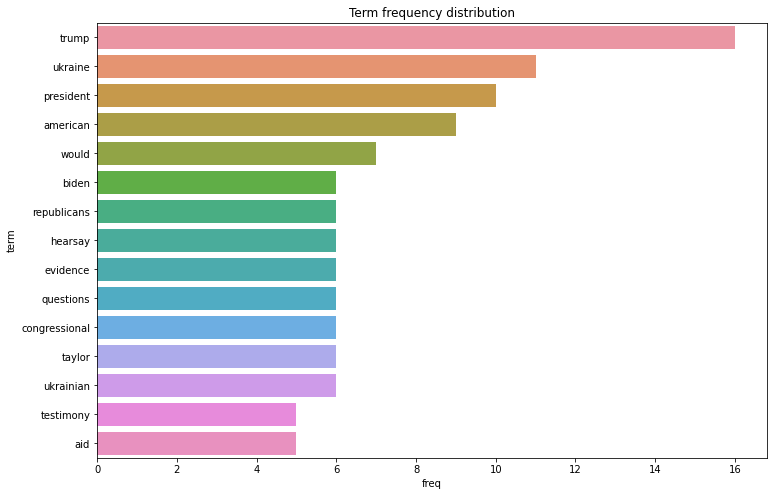

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(data=fdist_filtered, x='freq', y='term')
plt.title('Term frequency distribution')
plt.show()

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

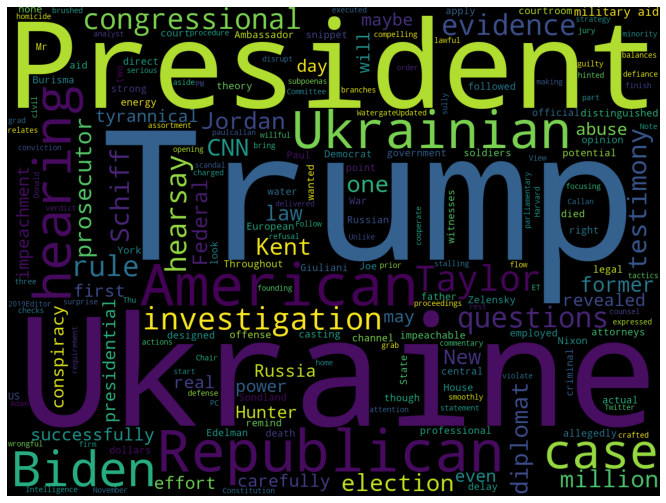

In [15]:
cloud = WordCloud(width=1200, height=900, stopwords=STOPWORDS).generate(doc)
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

In [16]:
doc = docs[4]
spacy_doc = nlp(doc)
remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 'ORDINAL', 
          'CARDINAL', 'LOC', 'ORG', 'EVENT', 'NORP', 'GPE']
ents = [ent.text for ent in spacy_doc.ents
           if ent.label_ not in remove]
terms = list(set(ents))

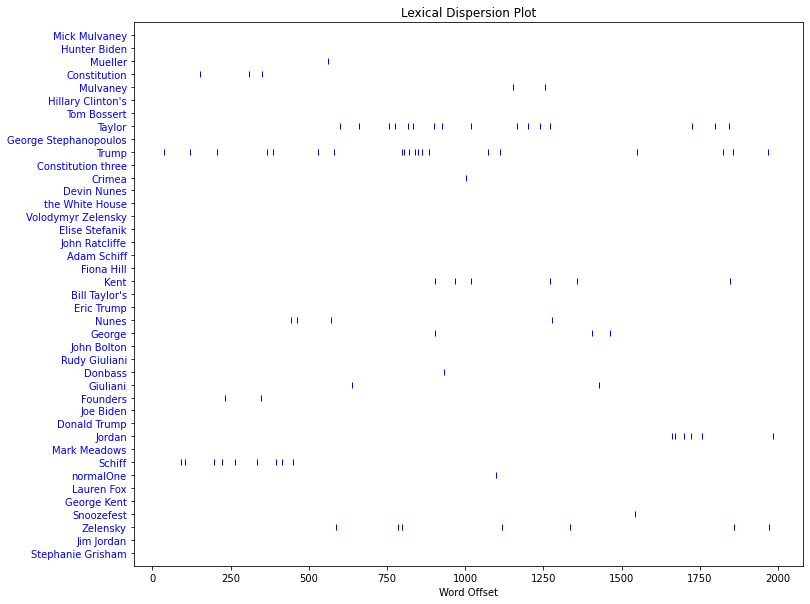

In [17]:

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

tokenized = word_tokenize(doc)
Text(tokenized).dispersion_plot(terms)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [18]:
from yellowbrick.text.postag import PosTagVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
doc = docs[9]
doc

'Alicia Keys will return as host of the Grammy Awards in 2020Updated 9:48 PM ET, Thu November 14, 2019(CNN) - Alicia Keys is hosting the Grammy Awards again next year.Her 2020 return for the 62nd Annual Grammys puts her in rare company after she became the first female to host the awards in 14 years. Before that, the last woman was Queen Latifah in 2005."At first, I did think last year was a one-time thing, but when the opportunity came back around, there was no question about returning as host," Keys told Billboard in a statement. "Last year was such a powerful experience for me. Not only did I feel the love in the room, but I felt it from around the world and it confirmed the healing and unifying power of music."The show will take take place on January 26 at the Staples Center in Los Angeles.This year, Keys said her status as a regular award receiver helped with her hosting duties."I know what it feels like to be on that stage, and I\'m going to bring that vibe and energy," the enter

In [30]:
tokens = word_tokenize(doc)
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(' '.join([visualizer.colorize(token, color) for color, token in visualizer.tagged]))

Alicia Keys will return as host of the Grammy Awards in 2020Updated 9:48 PM ET , Thu November 14 , 2019 ( CNN ) - Alicia Keys is hosting the Grammy Awards again next year.Her 2020 return for the 62nd Annual Grammys puts her in rare company after she became the first female to host the awards in 14 years . Before that , the last woman was Queen Latifah in 2005 . `` At first , I did think last year was a one-time thing , but when the opportunity came back around , there was no question about returning as host , '' Keys told Billboard in a statement . `` Last year was such a powerful experience for me . Not only did I feel the love in the room , but I felt it from around the world and it confirmed the healing and unifying power of music . `` The show will take take place on January 26 at the Staples Center in Los Angeles.This year , Keys said her status as a regular award receiver helped with her hosting duties . `` I know what it feels like to be on that stage , and I 'm going to bring t